In [2]:
# Implementation of LeNet-5 in keras 
# [LeCun et al., 1998. Gradient based learning applied to document recognition]
# Some minor changes are made to the architecture like using ReLU activation instead of 
# sigmoid/tanh, max pooling instead of avg pooling and softmax output layer 

import os
os.chdir("C:/Users/LACANAU/Documents/Python Scripts/Machine_Learning_Web")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('LeNet-5/train.csv')
test = pd.read_csv('LeNet-5/test.csv')

Y_train = train[['label']]
X_train = train.drop(train.columns[[0]], axis=1)
X_test = test

#Visualizing the data
#sample = X_train.iloc[10, :]
#sample = sample.values.reshape([28,28])
#plt.imshow(sample, cmap='gray')

X_train = np.array(X_train)
X_test = np.array(X_test)

#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train[0:9999, : , : , :]
Y_train = Y_train[0:9999]
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)


import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train ,Y_train,  steps_per_epoch = 10, epochs = 42)

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

index = np.arange(1, 28001)

labels = labels.reshape([len(labels),1])
index = index.reshape([len(index), 1])

final = np.concatenate([index, labels], axis = 1)

#Prediction csv file
np.savetxt("LeNet-5/mnist_1.csv", final, delimiter = " ", fmt = '%s')

Epoch 1/42


ResourceExhaustedError: OOM when allocating tensor with shape[42000,6,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_3/convolution = Conv2D[T=DT_FLOAT, _class=["loc:@training_1/Adam/gradients/conv2d_3/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_1/Adam/gradients/conv2d_3/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_3/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


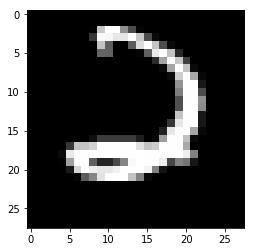

In [17]:
#Visualizing test data
test_data = test.iloc[24090, :]
test_data = test_data.values.reshape([28,28])
plt.imshow(test_data, cmap='gray')